# PHASE 2 MILESTONE 1

# 1. Introduction

* Name : Ajeng Nilta Adriani
* Batch : FTDS - 002

* Link HuggingFaces : https://huggingface.co/spaces/Ajeng/Churn-Predict
* Link Koyeb : https://app.koyeb.com/apps/c33dad97-0f8a-4846-9d4f-a3b9a8bbfc57/services/281190d9-6f1f-47fe-b432-97d71f6eabde

## 1.1 About The Dataset 

The data set used in this project is available in the Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn and contains twenty columns (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The Churn column (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company.

|      `COLUMN`      | DESCRIPTION                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `customerID`    | ID Customer                                                                                                       |
|      `gender`      | Whether the customer is a male or a female                                                                        |
|  `SeniorCitizen`   | Whether the customer is a senior citizen or not (1, 0)                                                            |
|     `Partner`      | Whether the customer has a partner or not (Yes, No)                                                               |
|    `Dependents`    | Whether the customer has dependents or not (Yes, No)                                                              |
|      `tenure`      | Number of months the customer has stayed with the company                                                         |
|   `PhoneService`   | Whether the customer has a phone service or not (Yes, No)                                                         |
|  `MultipleLines`   | Whether the customer has multiple lines or not (Yes, No, No phone service)                                        |
| `InternetService`  | Customer’s internet service provider (DSL, Fiber optic, No)                                                       |
|  `OnlineSecurity`  | Whether the customer has online security or not (Yes, No, No internet service)                                    |
|   `OnlineBackup`   | Whether the customer has online backup or not (Yes, No, No internet service)                                      |
| `DeviceProtection` | Whether the customer has device protection or not (Yes, No, No internet service)                                  |
|   `TechSupport`    | Whether the customer has tech support or not (Yes, No, No internet service)                                       |
|   `StreamingTV`    | Whether the customer has streaming TV or not (Yes, No, No internet service)                                       |
| `StreamingMovies`  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                   |
|     `Contract`     | The contract term of the customer (Month-to-month, One year, Two year)                                            |
| `PaperlessBilling` | Whether the customer has paperless billing or not (Yes, No)                                                       |
|  `PaymentMethod`   | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic)) |
|  `MonthlyCharges`  | The amount charged to the customer monthly                                                                        |
|   `TotalCharges`   | The total amount charged to the customer                                                                          |
|      `Churn`       | Whether the customer churned or not (Yes or No)                                                                   |

## 1.2 Business Problem Understanding

### 1.2.1 Context

TELCO AND CHURN

TELCO is a company that is engaged in providing internet services and other services (assumed to be streaming services and the like).CHURN here is defined as a customer who stops subscribing to services provided by TELCO.

Churn in internet service providers can be caused by several things as follows:

* Customers get better offers from competitors.
* The quality of services provided over time is getting worse.
* customer changes domicile that is not reached by the provider.

### 1.2.2 Objectives

Based on these problems, TELCO wants to have a Deep Learning model that has the ability to predict the possibility of customers who will churn or who will not, so that preventive actions can be taken such as providing incentives / promos. But the model must also be able to ensure that it is the customer who will really churn, if it is given to a loyal customer or customer who will not churn, it will actually harm the company.

The company also wants to know the factors / variables that influence the customer to churn, so that TELCO can prepare an improvement strategy for their business.

Describe : melihat 
EDA : ada duplicated/Missing
split data : 

# 2. Import Libraries

Import the library to be used in dataset analysis.

In [1]:
!pip install pydot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, OrdinalEncoder 
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn import set_config
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe

import pickle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)

# 3. Data Loading

Chapter three is intended as a chapter for loading data into a notebook. The data entered into the notebook will be assigned to the df variable. Then, after the data is successfully loaded into the notebook I will show a preview of the first 5 rows and the last 5 rows in the dataset.

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# making a copy of the freshly loaded dataset

df_dirty = df.copy()

# 4. Data Cleaning

Data cleaning is a necessary step to check data info. I checked the data info to get the total row count and data type in each column.

## 4.1 Handling Missing Value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# changing `TotalCharges` dtype from object to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

And then it is time to check the missing values in the dataset.

In [9]:
missing_values = {}

for x in list(df.columns):
    missing_values[x] = 0
    for y in df[x]:
        if y in ['N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be sweeping for.
            missing_values[x] = missing_values[x] + 1

missing_values

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'Churn': 0}

As shown above, after I changed the TotalCharges column dtype from 'object' to numeric, apparently, there are missing values in that column. Before handling those missing values, I want to see those data entries that have missing values.

Below are data entries that have missing values.

In [10]:
# calling out all rows that contains missing values

df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


I found interesting information from those data entries that had missing values. As you can see above, in tenure column, the values ​​are 0. This is contradictory to present values ​​in MonthlyCharges columns. tenure is the number of months the customer has stayed with the company, while MonthlyCharges is the amount charged to the customer monthly. If the tenure is 0 then the MonthlyCharges should be zero too.

But I have decided to drop those rows from the dataset because there are no other columns, data, or information to do any imputation on the missing values ​​and correct the data contained in the tenure and MonthlyCharges columns.

In [11]:
# dropping Missing Valur from the Dataset

df.dropna(inplace=True)

## 4.2 Duplicated Data Handling 

The next step is checking for duplicate data contained in the dataset. But, before that, I will drop customerID from the dataset because I won't be using that column for my analysis. The customerID column is useless to explain whether not the customer will churn.

In [12]:
df.drop(columns='customerID', inplace=True)

In [13]:
# works on the duplicate
dp = df.duplicated()

# How much duplicated data?
print("Currently, I have ", df[dp].shape[0], "rows of duplicate data")

# calling out the duplicated data
df[dp]

Currently, I have  22 rows of duplicate data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


## 4.3 Columns Manipulation

In this sub-chapter, I will manipulate the data in certain column for better encoding puposes.

Here is the unique value in PaymentMethod column:

PaymentMethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']

As we can see, there are values containing brackets, I want to remove the ' (automatic)' to avoid some error that may occur while I am doing exploratory data analysis.

In [14]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

And then, SeniorCitizen and Churn columns are categorical columns, therefore I want to change their value to 'Yes' and 'No'. Yes -> 1 and No -> 0.

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [16]:
df_clean_no_manip = df.copy()

All the cleaning and manipulation processes are done, and now I will make a copy of cleaned df for research purposes.

In [17]:
# duplicating the cleaned df

df_clean = df.copy()

In [18]:
numerical = df_clean[['tenure','MonthlyCharges','TotalCharges']].columns.tolist()
category = df_clean[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].columns.tolist()

In [19]:
for i in category:
    print(i)
    print(df_clean[i].value_counts())
    print('-'*30)

gender
Male      3549
Female    3483
Name: gender, dtype: int64
------------------------------
SeniorCitizen
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64
------------------------------
Partner
No     3639
Yes    3393
Name: Partner, dtype: int64
------------------------------
Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     3087
Yes       

# 5. exploraty Data Analysis (EDA)

Exploratory data analysis is the process of analyzing the main characteristics of a data set, typically using visualization techniques and summary statistics. The goal is to comprehend the data, identify patterns and anomalies, and validate assumptions before proceeding with further analysis.

The first thing I want to find out is the number of classes or labels contained in the column that I will make the target of the machine learning model that I will create. Therefore, I will visualize the target column, namely the Churn column.

In [20]:
df_clean['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

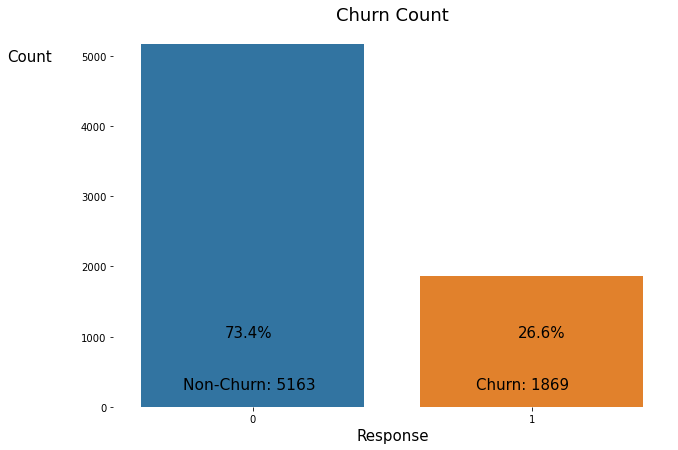

In [21]:
outcome = df_clean['Churn'].sum()
no_outcome = len(df_clean['Churn']) - outcome

outcome_perc = round(outcome/len(df_clean['Churn']) * 100, 1)
no_outcome_perc = round(no_outcome/len(df_clean['Churn']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('Churn', data = df_clean)
plt.annotate(f'Non-Churn: {no_outcome}', 
             xy=(-0.25, 250),
            size=15.5)

plt.annotate('Churn: {}'.format(outcome), 
             xy=(0.8, 250),
            size=15)

plt.annotate('{}%'.format(no_outcome_perc), xy=(-0.1, 1000),size=15)
plt.annotate('{}%'.format(outcome_perc), xy=(0.95, 1000),size=15)
plt.title('Churn Count', size=18)
plt.xlabel("Response",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.15,.9)
plt.box(False)

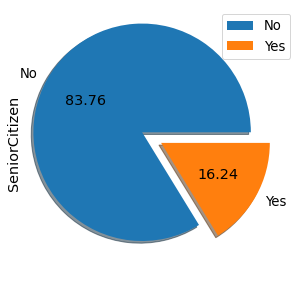

In [22]:
plt.figure(figsize = (8,5),facecolor='white')
df_clean['SeniorCitizen'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['No','Yes'])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

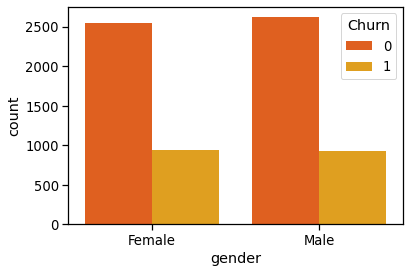

In [23]:
sns.countplot(data=df_clean,x='gender',hue='Churn',palette="autumn")

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

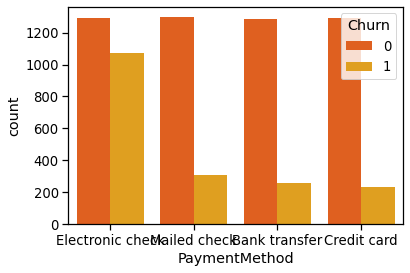

In [24]:
sns.countplot(data=df_clean,x='PaymentMethod',hue='Churn',palette="autumn")

Eksplorasi Data:
- data menunjukan imbalace data pada data target, dengan 73,4% untuk no dan 26,6% untuk yes
- senior citizen yang mana merupakan konsumen lansia, data menunjukanlebih banyak kategori 0 (tidak melakukan churn) dibandingkan kategori 1
- data gender menunjukan data yang seimbang antar kedua kategori
- data dependent menunjukan kategori 0 (tidak melakukan churn) lebih banyak dibandingkan kategori 1
- data payment method menunjukan electronick check merupakan kategori tertinggi yang melakukan churn

# 6. Data Preprocessing

## 6.1 Split Data

In [25]:
feature = df_clean.drop('Churn', axis=1)
target = df_clean['Churn']

In [26]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(feature,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [27]:
y_train.value_counts()

0    3300
1    1200
Name: Churn, dtype: int64

In [28]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_val = pd.concat([x_val, y_val], axis=1)
testing = pd.concat([x_test, y_test], axis=1)

Proses pembagian data kedalam 3 dataframe, yaitu:
- data train dengan besaran 80% dari data
- data valuation dengan besaran 20%, data diambil dari data train
- data test dengan besaran 20% dari data

Penentuan kolom target dan kolom feature yang dituliskan dengan y untuk target dan x untuk feature

## 6.2 Eda for Modeling

In [29]:
df_eda.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3012,Male,No,Yes,Yes,54,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card,65.65,3566.7,0
1965,Male,No,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer,49.55,1210.4,1


### Numerical Feature

In [30]:
df_num = ['tenure','MonthlyCharges','TotalCharges']

In [31]:
skew = df_eda[df_num].skew()
skewness = pd.DataFrame(skew)
skewness.columns =['value']
skewness

,value
tenure,0.230928
MonthlyCharges,-0.226500
TotalCharges,0.950924


In [32]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
tenure,0.230928,distribusi normal
MonthlyCharges,-0.226500,distribusi normal
TotalCharges,0.950924,distribusi tidak normal


In [33]:
def diagnostic_plots(df_eda, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_eda[df_num][variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_eda[df_num][variable])
    plt.title('Boxplot')

    plt.show()

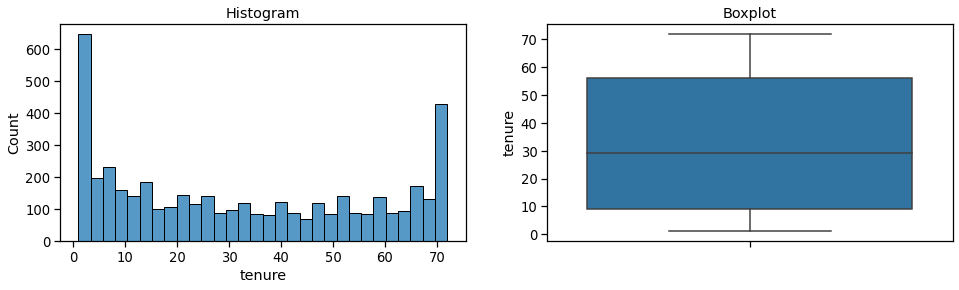

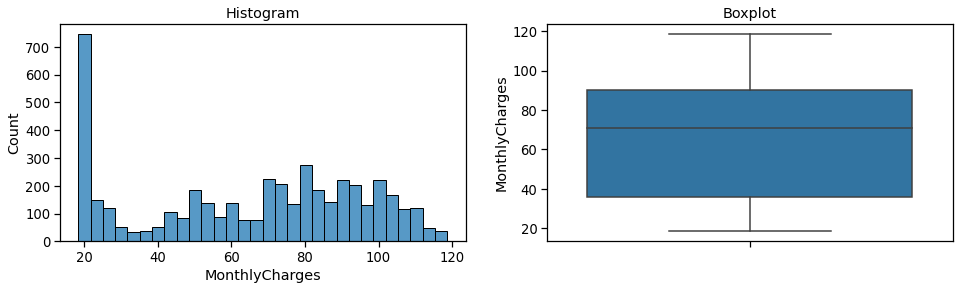

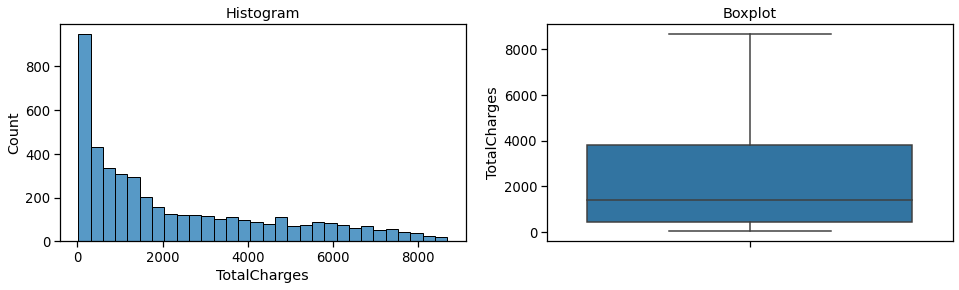

In [34]:
diagnostic_plots(df_eda[df_num], 'tenure')
diagnostic_plots(df_eda[df_num], 'MonthlyCharges')
diagnostic_plots(df_eda[df_num], 'TotalCharges')

In [35]:
for k in df_eda[df_num]:
  mean = df_eda[df_num][k].mean()
  std = df_eda[df_num][k].std()

  upper = mean + (3 * std)
  lower = mean - (3 * std)

  outlier = df_eda[(df_eda[df_num][k] > upper) | (df_eda[df_num][k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_eda[df_num].shape[0] * 100, '%')
  print('='*70)

tenure
count of outlier:  0
percent k of outlier:  0.0 %
MonthlyCharges
count of outlier:  0
percent k of outlier:  0.0 %
TotalCharges
count of outlier:  0
percent k of outlier:  0.0 %


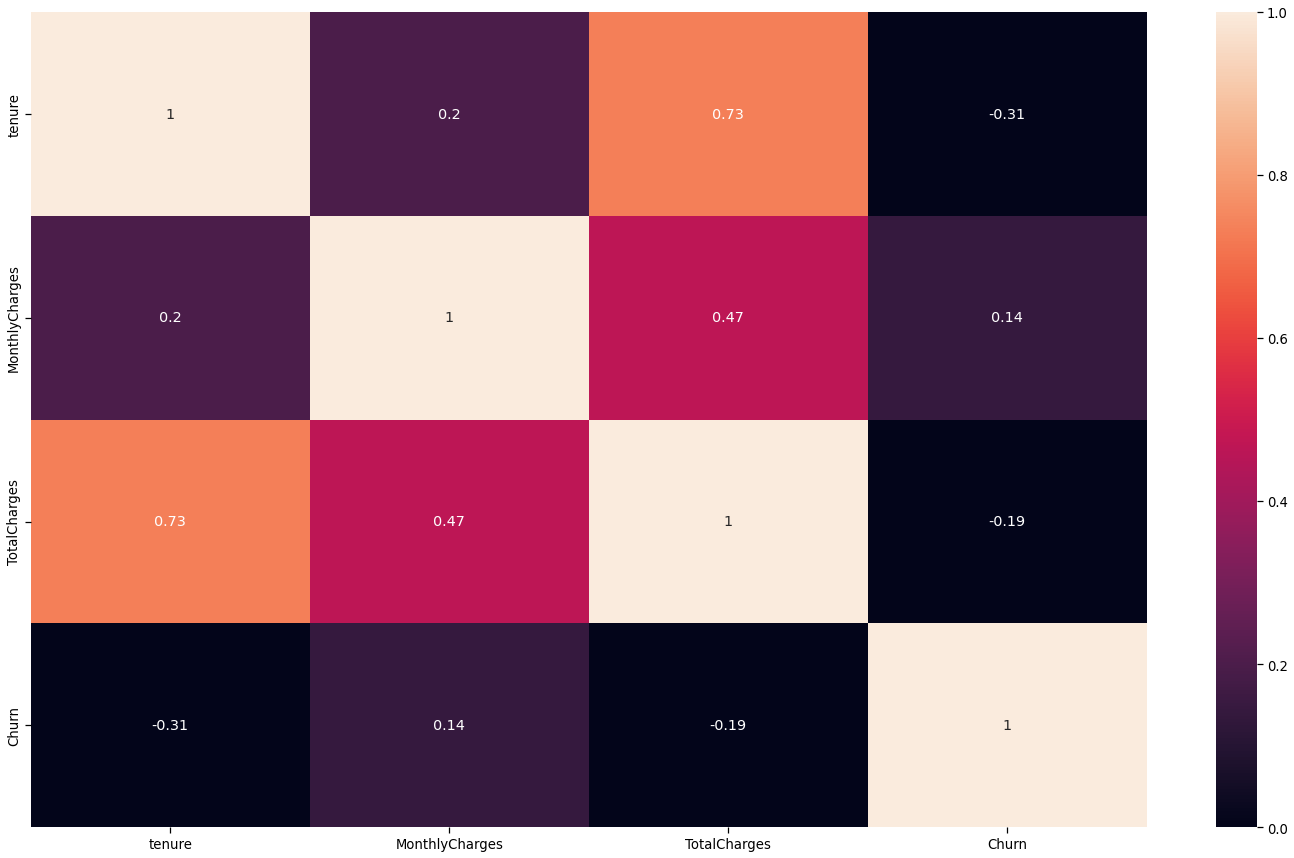

In [36]:
fig,ax = plt.subplots(figsize=[25,15])

corr = df_eda[df_num + ['Churn']].corr(method = 'kendall')

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

In [37]:
scaler = StandardScaler()

df_num = scaler.fit_transform(df_eda[df_num])
df_num = pd.DataFrame(df_num)

In [38]:
df_num.columns =['tenure','MonthlyCharges','TotalCharges']
df_num

,tenure,MonthlyCharges,TotalCharges
0,0.868737,0.017412,0.545905
1,-0.353345,-0.516030,-0.483776
2,-1.045857,-0.641935,-0.862298
3,1.031681,1.167128,1.469879
4,1.601986,0.819231,1.913971
...,...,...,...
4495,1.520514,0.391815,1.298884
4496,0.176224,1.115772,0.506074
4497,0.746529,-1.329446,-0.461796
4498,-0.475553,0.410038,-0.302600


### Categorical Feature 

In [39]:
df_cat = df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
df_cat.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3012,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card
1965,Male,No,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer
1679,Male,Yes,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [40]:
for i in df_cat:
    print(i)
    print(df_cat[i].value_counts())
    print('-'*30)

gender
Male      2281
Female    2219
Name: gender, dtype: int64
------------------------------
SeniorCitizen
No     3769
Yes     731
Name: SeniorCitizen, dtype: int64
------------------------------
Partner
No     2303
Yes    2197
Name: Partner, dtype: int64
------------------------------
Dependents
No     3141
Yes    1359
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    4064
No      436
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  2140
Yes                 1924
No phone service     436
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    1984
DSL            1553
No              963
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     2244
Yes                    1293
No internet service     963
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     1942
Yes       

### One Hot Encoding

In [41]:
gender = ['Male','Female']
SeniorCitizen = ['No', 'Yes']
Partner = ['No','Yes']
Dependents = ['No','Yes']
PhoneService = ['No','Yes']
MultipleLines = ['No phone service','No','Yes']
InternetService = ['No','DSL','Fiber optic']
OnlineSecurity = ['No internet service','No','Yes']
OnlineBackup = ['No internet service','No','Yes']
DeviceProtection = ['No internet service','No','Yes']
TechSupport = ['No internet service','No','Yes']
StreamingTV = ['No internet service','No','Yes']
StreamingMovies = ['No internet service','No','Yes']
Contract = ['Month-to-month','One year','Two year']
PaperlessBilling = ['No','Yes']

ord_enc = OrdinalEncoder(categories=[gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, StreamingTV, StreamingMovies, Contract, PaperlessBilling])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]))

cat_ord.columns = ['gender_ord', 'SeniorCitizen_ord','Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord']

In [42]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['PaymentMethod'])

review = pd.concat([df_cat[['PaymentMethod']].reset_index(drop=True), cat_ohe], axis=1)
review.head(5)

,PaymentMethod,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Credit card,0.0,1.0,0.0,0.0
1,Bank transfer,1.0,0.0,0.0,0.0
2,Mailed check,0.0,0.0,0.0,1.0
3,Credit card,0.0,1.0,0.0,0.0
4,Bank transfer,1.0,0.0,0.0,0.0


In [43]:
df_categorical = pd.concat([cat_ord, cat_ohe], axis=1, ignore_index=True)
df_categorical.columns =['gender_ord', 'SeniorCitizen_ord', 'Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df_categorical

,gender_ord,SeniorCitizen_ord,Partner_ord,Dependents_ord,PhoneService_ord,MultipleLines_ord,InternetService_ord,OnlineSecurity_ord,DeviceProtection_ord,StreamingTV_ord,StreamingMovies_ord,Contract_ord,PaperlessBilling_ord,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
4496,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4497,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4498,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [44]:
x_chi = df_categorical
y_chi = y_train

In [45]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_chi, y_chi)
fit.scores_

array([1.97888074e-01, 6.72752456e+01, 6.02326416e+01, 9.80206201e+01,
       6.76673228e-04, 1.05811623e+00, 2.17629551e+02, 1.77971485e+00,
       1.67274331e+01, 6.55774522e+01, 6.07181306e+01, 7.31083848e+02,
       6.79633923e+01, 5.14643563e+01, 6.25000000e+01, 2.75141790e+02,
       3.12481117e+01])

In [46]:
np.round_(fit.scores_)

array([  0.,  67.,  60.,  98.,   0.,   1., 218.,   2.,  17.,  66.,  61.,
       731.,  68.,  51.,  62., 275.,  31.])

In [47]:
chi = pd.Series(fit.scores_)
chi.index = x_chi.columns
chi.sort_values(ascending=False)

Contract_ord                               731.083848
PaymentMethod_Electronic check             275.141790
InternetService_ord                        217.629551
Dependents_ord                              98.020620
PaperlessBilling_ord                        67.963392
SeniorCitizen_ord                           67.275246
StreamingTV_ord                             65.577452
PaymentMethod_Credit card (automatic)       62.500000
StreamingMovies_ord                         60.718131
Partner_ord                                 60.232642
PaymentMethod_Bank transfer (automatic)     51.464356
PaymentMethod_Mailed check                  31.248112
DeviceProtection_ord                        16.727433
OnlineSecurity_ord                           1.779715
MultipleLines_ord                            1.058116
gender_ord                                   0.197888
PhoneService_ord                             0.000677
dtype: float64

In [48]:
df_mod = pd.concat([df_num, df_categorical], axis=1, ignore_index=True)
df_mod.columns =['tenure','MonthlyCharges','TotalCharges','gender_ord', 'SeniorCitizen_ord', 'Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df_mod

,tenure,MonthlyCharges,TotalCharges,gender_ord,SeniorCitizen_ord,Partner_ord,Dependents_ord,PhoneService_ord,MultipleLines_ord,InternetService_ord,OnlineSecurity_ord,DeviceProtection_ord,StreamingTV_ord,StreamingMovies_ord,Contract_ord,PaperlessBilling_ord,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.868737,0.017412,0.545905,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,-0.353345,-0.516030,-0.483776,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.045857,-0.641935,-0.862298,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.031681,1.167128,1.469879,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.601986,0.819231,1.913971,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.520514,0.391815,1.298884,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
4496,0.176224,1.115772,0.506074,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4497,0.746529,-1.329446,-0.461796,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4498,-0.475553,0.410038,-0.302600,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# 7. Preprocessing Data

## 7.1 Pipeline

### Pipeline Numerical

In [49]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(x_train[['tenure', 'MonthlyCharges']])
num_tr

array([[ 0.86873711,  0.01741177],
       [-0.35334454, -0.51602991],
       [-1.04585748, -0.6419354 ],
       ...,
       [ 0.74652895, -1.32944565],
       [-0.47555271,  0.4100381 ],
       [ 1.6019861 , -0.02234786]])

### Pipeline Categorical

In [50]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['No', 'Yes'], 
                                                   ['No','Yes'], 
                                                   ['No','Yes'], 
                                                   ['No','DSL','Fiber optic'], 
                                                   ['No internet service','No','Yes'], 
                                                   ['No internet service','No','Yes'], 
                                                   ['No internet service','No','Yes'], 
                                                   ['Month-to-month','One year','Two year'], 
                                                   ['No','Yes']]))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(x_train[['SeniorCitizen','Partner', 'Dependents', 'InternetService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']])
cat_1_tr

array([[0., 1., 1., ..., 1., 2., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 2., 2., 1.]])

In [51]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(x_train[['PaymentMethod']])
cat_2_tr

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [52]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure', 'MonthlyCharges']),
        ("cat_ord", cat_1_pipeline, ['SeniorCitizen','Partner', 'Dependents', 'InternetService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']),
        ("cat_ohe", cat_2_pipeline, ['PaymentMethod']),
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[ 0.86873711,  0.01741177,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.35334454, -0.51602991,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.04585748, -0.6419354 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.74652895, -1.32944565,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.47555271,  0.4100381 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.6019861 , -0.02234786,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [53]:
train_manual = np.array(df_mod[['tenure','MonthlyCharges','SeniorCitizen_ord', 'Partner_ord', 'Dependents_ord','InternetService_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

np.allclose(train_tr, train_manual)

True

In [54]:
train_tr.shape

(4500, 15)

In [55]:
x_model = pd.DataFrame(train_tr)
x_model

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.868737,0.017412,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,-0.353345,-0.516030,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.045857,-0.641935,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.031681,1.167128,0.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.601986,0.819231,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.520514,0.391815,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
4496,0.176224,1.115772,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4497,0.746529,-1.329446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4498,-0.475553,0.410038,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
val_tr = full_pipeline.transform(x_val)
val_tr

array([[ 1.43904188,  1.04122221,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.29027381,  0.64528257,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.50211262,  1.67406296,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.67923298,  0.85070732,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.787265  ,  1.09423505,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.56125005, -1.50008072,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [57]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[ 1.07241739,  0.35868192,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.04585748,  0.44482778,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86873711, -1.49179746,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.2088017 , -1.51333393,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.17622417, -0.81422713,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70579289, -1.49014081,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

### With Imbalanced Handling

In [58]:
full_imbhandling = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([2,3,4,5,6,7,8,9,10,11,12], sampling_strategy=0.9, random_state=0)),
])

full_imbhandling

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'DSL',
                                                                                               'Fiber '
                                                                                               'optic'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Ye...
                                                                                               'Yes']]))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['PaymentMethod'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12],
                         random_state=0, sampling_strategy=0.9))])

In [59]:
x_resampled, y_resampled = full_imbhandling.fit_resample(x_train[['tenure', 'MonthlyCharges','SeniorCitizen','Partner', 'Dependents', 'InternetService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']], y_train)

In [60]:
x_resampled

array([[ 0.86873711,  0.01741177,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.35334454, -0.51602991,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.04585748, -0.6419354 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.2799982 ,  0.4559871 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.88678197,  1.06909829,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.17039285,  0.3295712 ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [61]:
x_resampled.shape

(6270, 15)

In [62]:
y_resampled

0       0
1       1
2       0
3       0
4       0
       ..
6265    1
6266    1
6267    1
6268    1
6269    1
Name: Churn, Length: 6270, dtype: int64

In [63]:
## Display the Number of Data
print('X_train - length : ', x_resampled.shape)
print('X_val - length   : ', val_tr.shape)
print('X_test - length  : ', test_tr.shape)
print('Total - length   : ', x_resampled.shape[0] + val_tr.shape[0] + test_tr.shape[0])

X_train - length :  (6270, 15)
X_val - length   :  (1125, 15)
X_test - length  :  (1407, 15)
Total - length   :  8802


## 7.2 Pipeline Tensorflow

In [64]:
#train- handling imbalance
train_dataset = tf.data.Dataset.from_tensor_slices((x_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=6000).batch(32)


## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(32)

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(32)

# 8. Model

### Sequential

In [65]:
alp = 10
inp = x_resampled.shape[1]
out = 1
hid = int(len(x_resampled)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 39


In [66]:
# Sequential Model Architecture
model_seq1 = tf.keras.models.Sequential()

# Input layer
model_seq1.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq1.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq1.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm = tf.keras.optimizers.Adam()

# Compiling the model
model_seq1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
model_seq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 39)                624       
                                                                 
 dense_2 (Dense)             (None, 1)                 40        
                                                                 
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


In [68]:
train_seq1=model_seq1.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
196/196 [==============================] - 2s 4ms/step - loss: 0.5736 - accuracy: 0.7049 - val_loss: 0.5228 - val_accuracy: 0.7156
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7716 - val_loss: 0.4941 - val_accuracy: 0.7324
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7732 - val_loss: 0.4741 - val_accuracy: 0.7493
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7750 - val_loss: 0.5156 - val_accuracy: 0.7316
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7759 - val_loss: 0.4952 - val_accuracy: 0.7431
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7778 - val_loss: 0.5034 - val_accuracy: 0.7413
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 0.4635 - accuracy: 0.7805 - val_loss: 0.5027 - val_accuracy: 0.7467
Epoch 

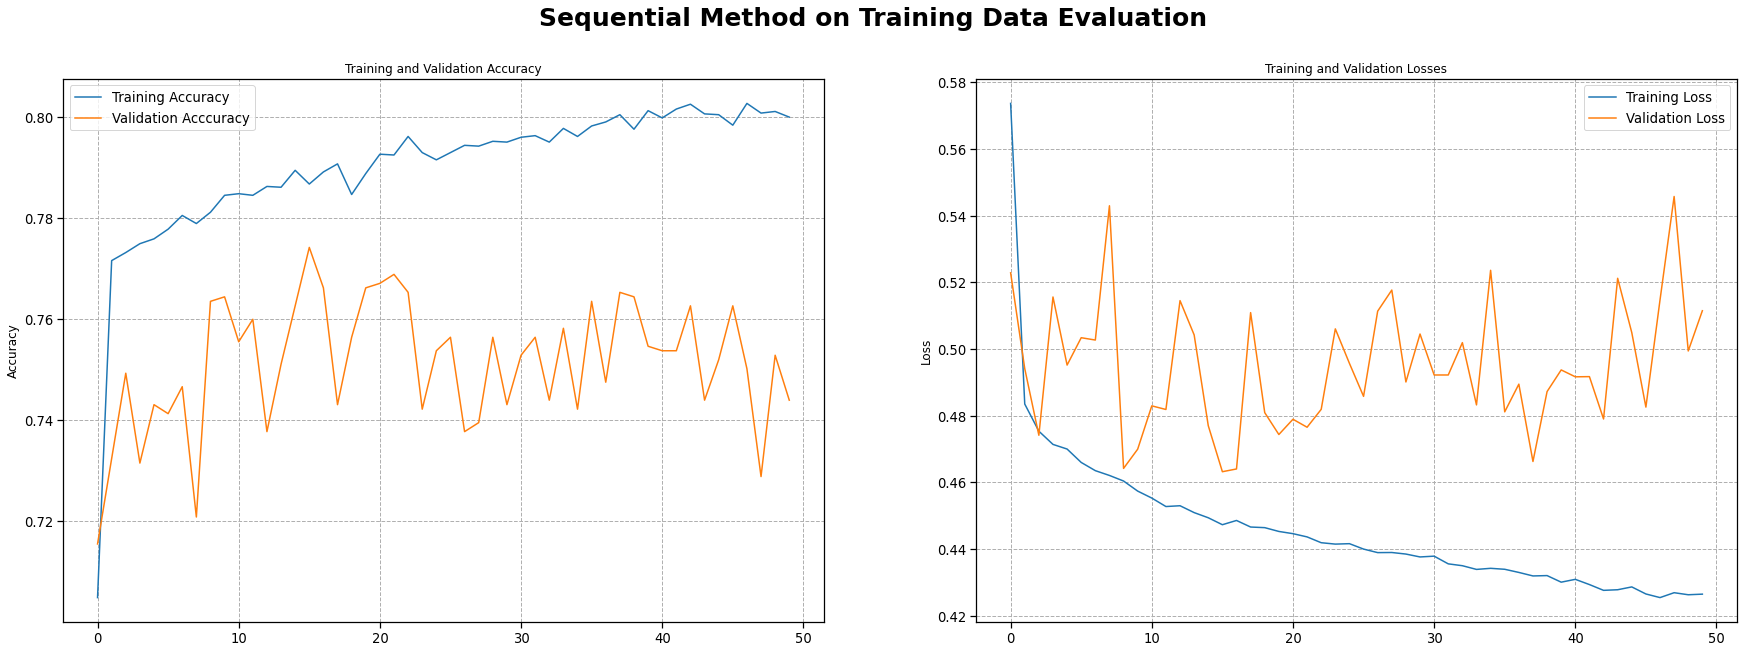

In [69]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(train_seq1.history['accuracy'],label="Training Accuracy")
plt.plot(train_seq1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(train_seq1.history['loss'], label="Training Loss")
plt.plot(train_seq1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

### Model Improvement - Sequential

In [70]:
# Sequential Model Architecture
model_seq2 = tf.keras.models.Sequential()

# Input layer
model_seq2.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq2.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq2.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm2 = tf.keras.optimizers.Adagrad()

# Compiling the model
model_seq2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
model_seq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 39)                624       
                                                                 
 dense_5 (Dense)             (None, 1)                 40        
                                                                 
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


In [72]:
#  Training the model
model_seq2.compile(loss='binary_crossentropy', 
                   optimizer=optm2,
                   metrics='accuracy')
model_seq2_history = model_seq2.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
196/196 [==============================] - 2s 3ms/step - loss: 0.6775 - accuracy: 0.5397 - val_loss: 0.7022 - val_accuracy: 0.5067
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6282 - val_loss: 0.6712 - val_accuracy: 0.6133
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6705 - val_loss: 0.6519 - val_accuracy: 0.6507
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6955 - val_loss: 0.6404 - val_accuracy: 0.6764
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.7131 - val_loss: 0.6299 - val_accuracy: 0.6907
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7241 - val_loss: 0.6218 - val_accuracy: 0.6996
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7292 - val_loss: 0.6136 - val_accuracy: 0.7076
Epoch 

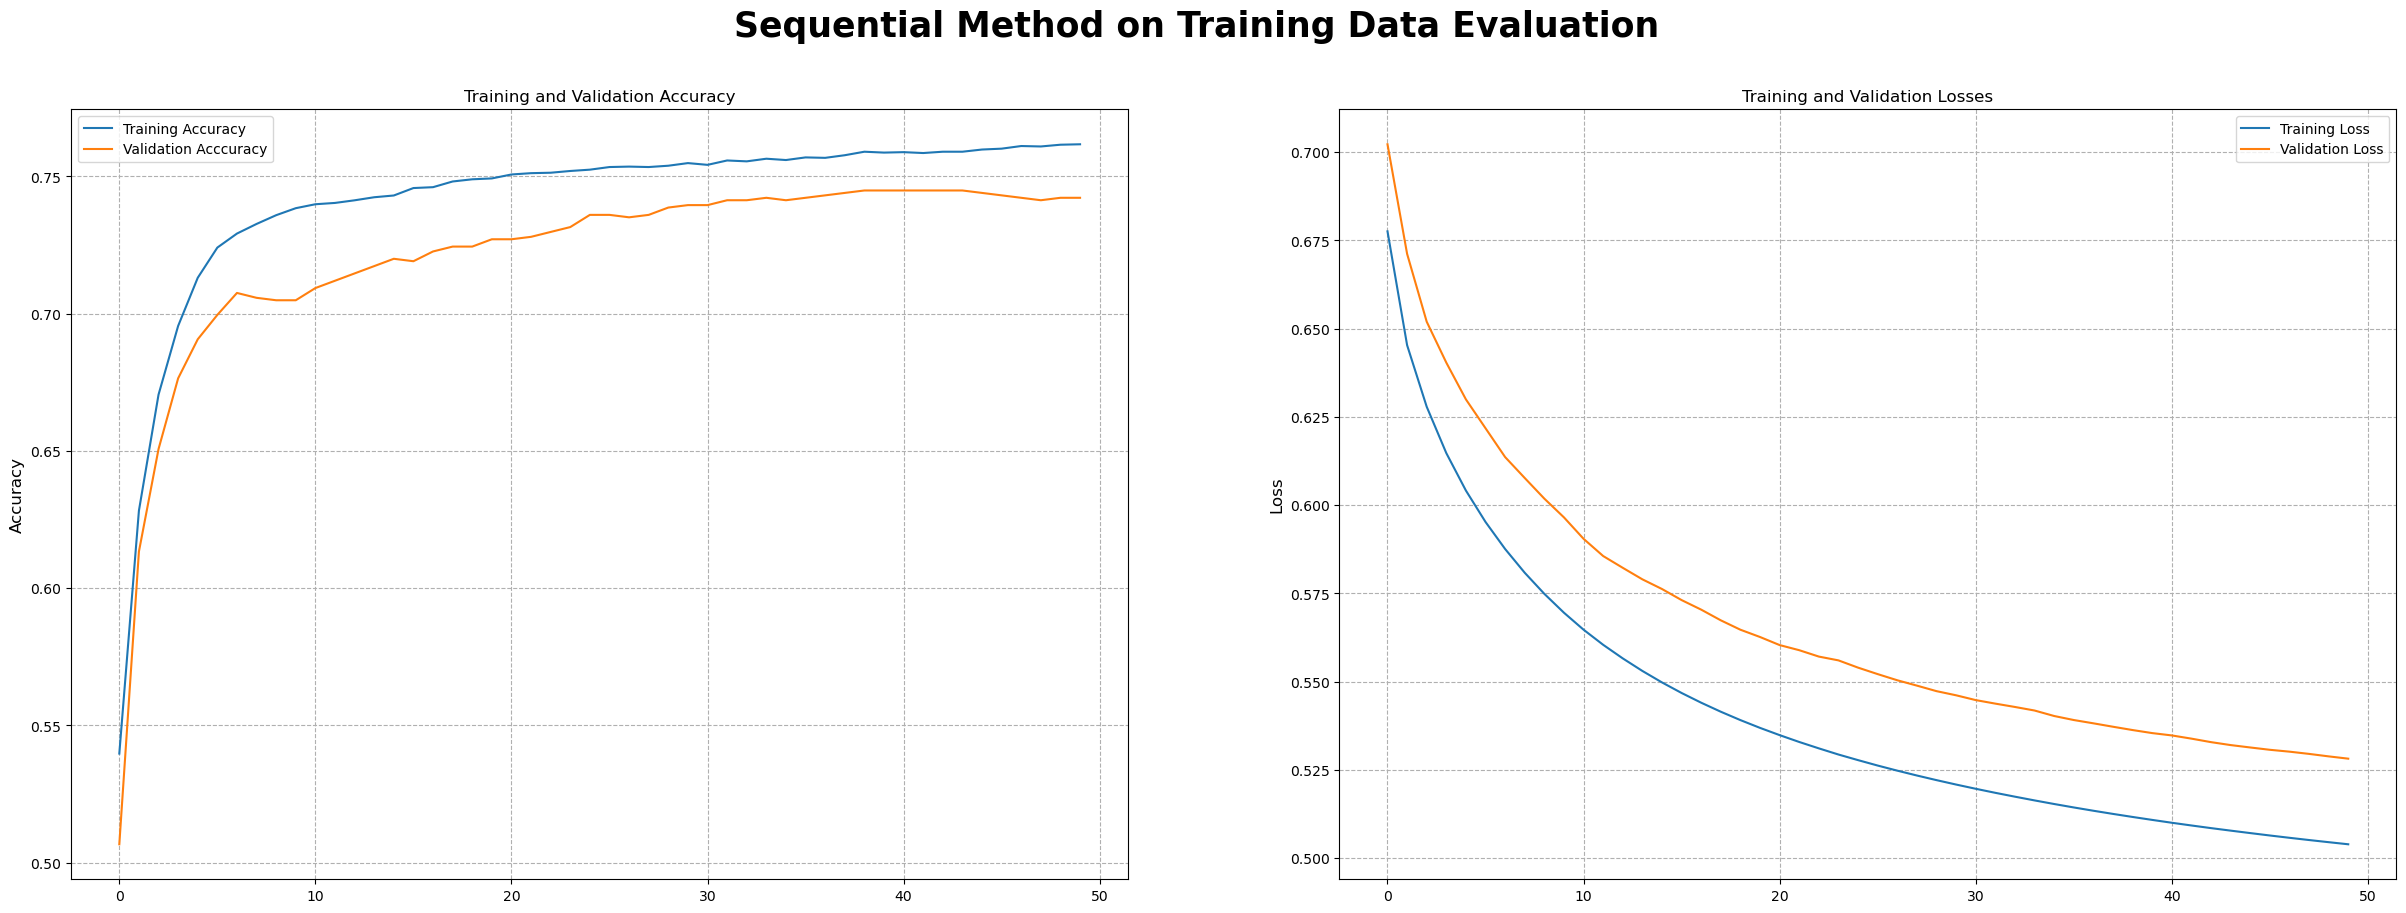

In [73]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_seq2_history.history['accuracy'],label="Training Accuracy")
plt.plot(model_seq2_history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_seq2_history.history['loss'], label="Training Loss")
plt.plot(model_seq2_history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

### Functional

In [74]:
# Setting the neuron
n_neuronFunc = (14, 7)
n_feature = x_resampled.shape[1]

# Input layer
data_input = Input(shape=(n_feature, )) # INPUT LAYER
hidden = data_input

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden = Dense(n, activation='relu')(hidden)
data_output = Dense(1, activation='sigmoid')(hidden) 

# Output layer
model_func = Model(inputs=data_input, outputs=data_output)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=optm, 
    metrics=['accuracy']
)

In [75]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_6 (Dense)             (None, 14)                224       
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Training the model
historyFunc = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 50)

Epoch 1/50
196/196 [==============================] - 2s 4ms/step - loss: 0.6233 - accuracy: 0.6734 - val_loss: 0.5365 - val_accuracy: 0.7067
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7660 - val_loss: 0.5124 - val_accuracy: 0.7342
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7756 - val_loss: 0.5280 - val_accuracy: 0.7280
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7751 - val_loss: 0.4932 - val_accuracy: 0.7493
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7775 - val_loss: 0.5175 - val_accuracy: 0.7253
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7804 - val_loss: 0.5028 - val_accuracy: 0.7404
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7825 - val_loss: 0.5004 - val_accuracy: 0.7440
Epoch 

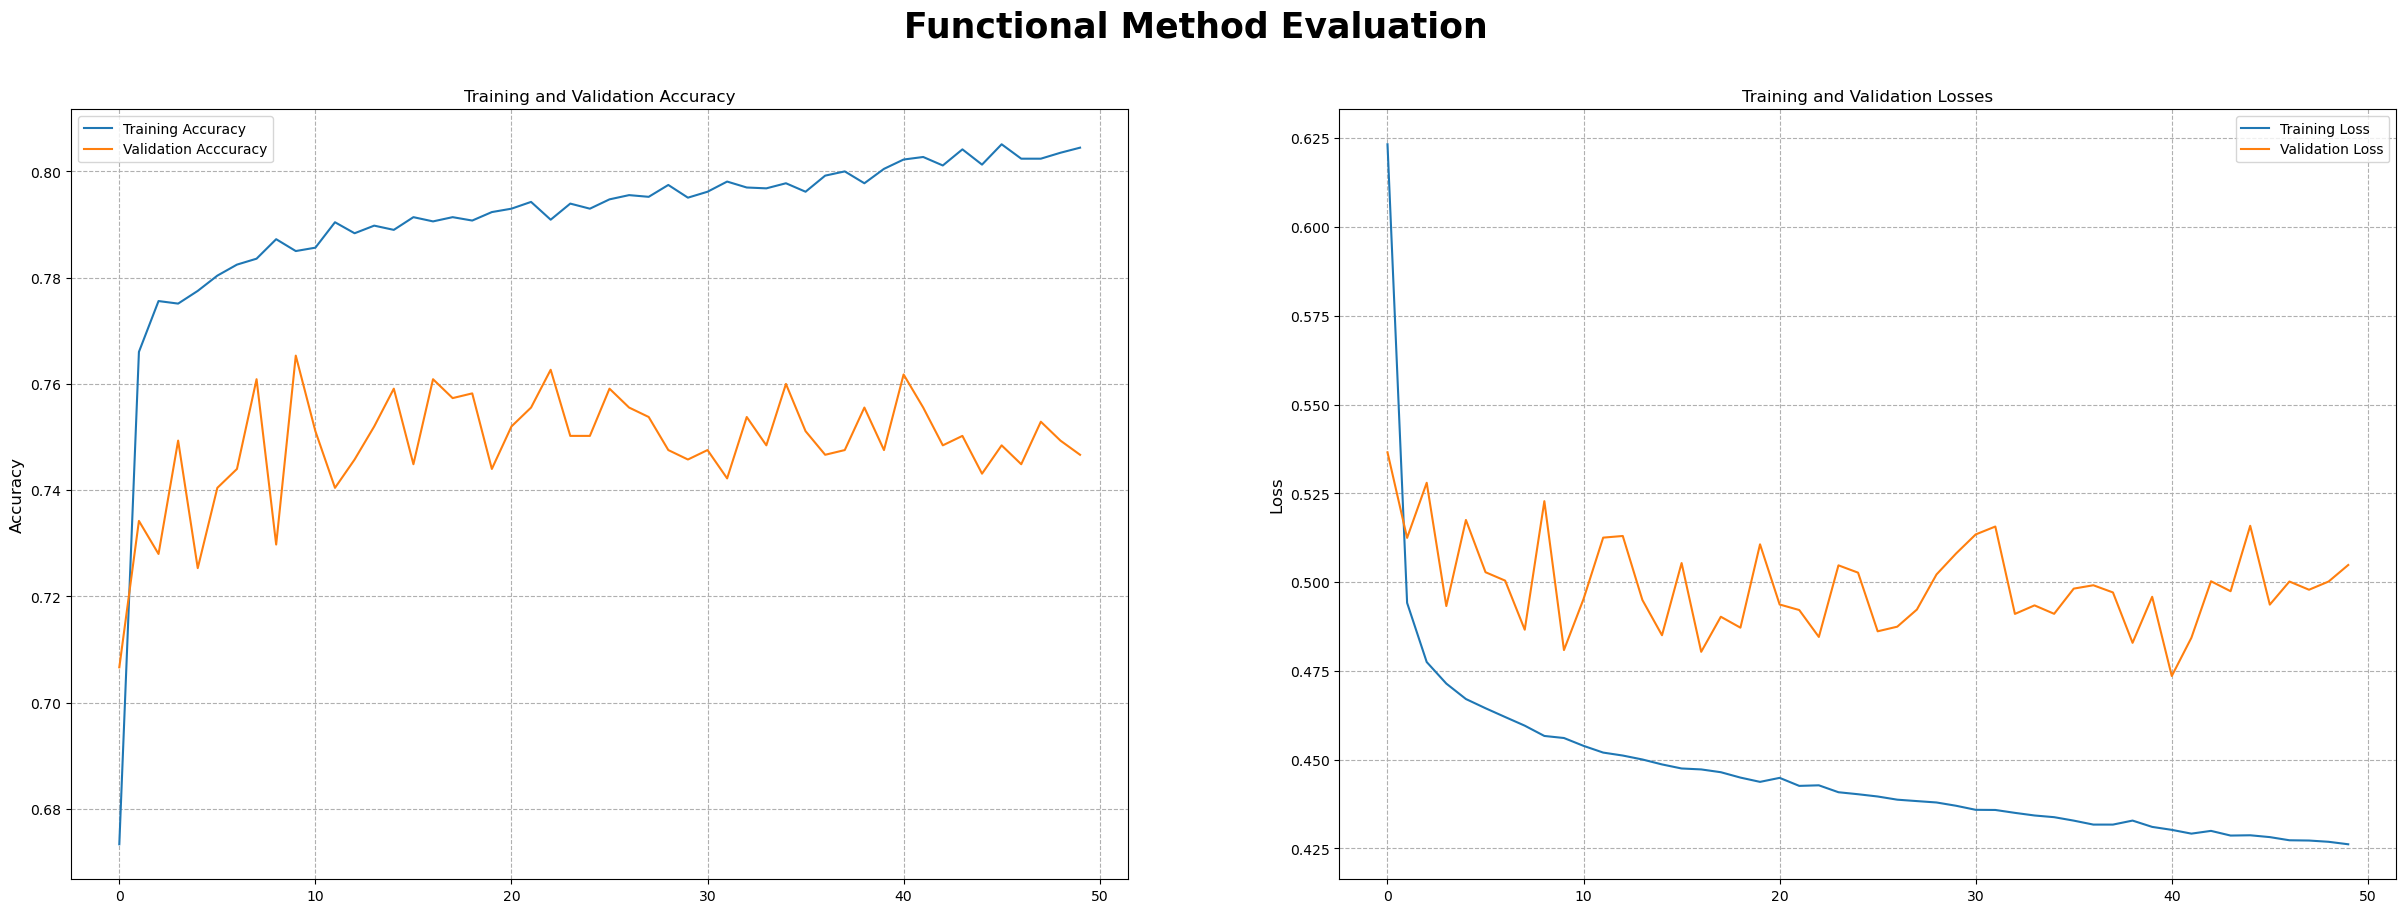

In [77]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(historyFunc.history['accuracy'], label = "Training Accuracy")
plt.plot(historyFunc.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(historyFunc.history['loss'], label = "Training Loss")
plt.plot(historyFunc.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

### Functional Improvement

In [78]:
n_neuronfunc = (14, 7)   

# Arsitektur Model_Functional
data_input_2 = Input(shape=(n_feature, )) # Input Layer

hidden2 = data_input_2
for n in n_neuronfunc: # Hidden Layer
    hidden2 = Dense(n, activation='relu')(hidden2)

data_out = Dense(1, activation='sigmoid')(hidden2) # Output Layer

model_func2 = Model(inputs=data_input_2, outputs=data_out)

In [79]:
model_func2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
Imp_history_func = model_func2.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
196/196 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.5110 - val_loss: 0.7226 - val_accuracy: 0.3893
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5802 - val_loss: 0.7019 - val_accuracy: 0.4924
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6386 - val_loss: 0.6866 - val_accuracy: 0.5529
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6882 - val_loss: 0.6712 - val_accuracy: 0.6231
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7155 - val_loss: 0.6567 - val_accuracy: 0.6489
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7380 - val_loss: 0.6385 - val_accuracy: 0.6871
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7530 - val_loss: 0.6187 - val_accuracy: 0.7076
Epoch 

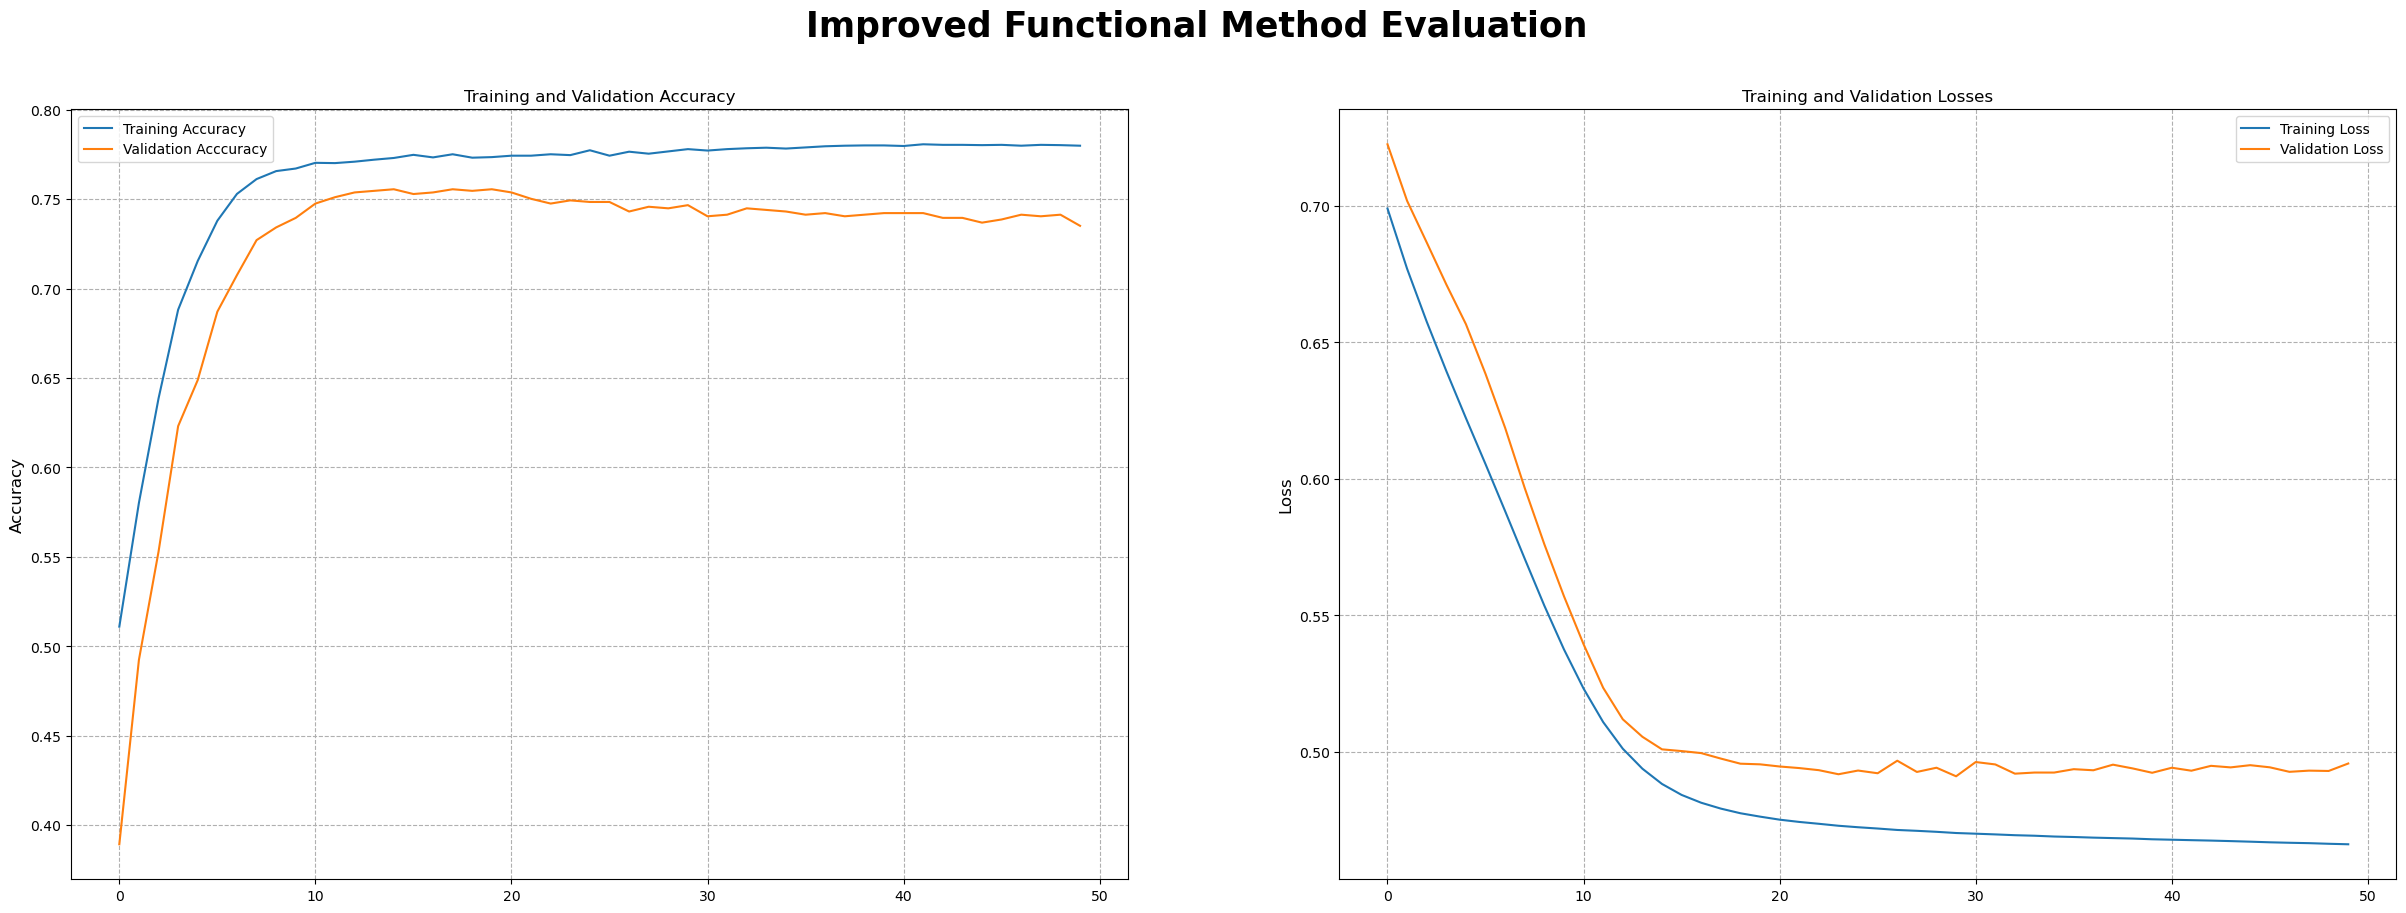

In [80]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improved Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(Imp_history_func.history['accuracy'],label="Training Accuracy")
plt.plot(Imp_history_func.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(Imp_history_func.history['loss'], label="Training Loss")
plt.plot(Imp_history_func.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

# Model Evaluation

### Sequantial

44/44 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.49      0.72      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.72      0.74      1407



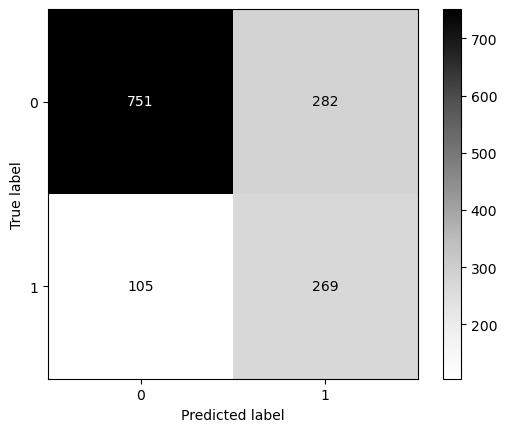

In [81]:
# predict probabilities
y_pred_sequent = model_seq2.predict(test_dataset)
y_pred_sequent = (y_pred_sequent > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_sequent, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_sequent)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

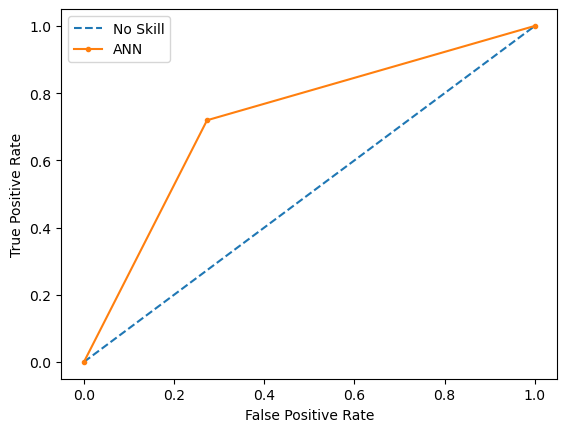

AUC score: 0.7231300246931476


In [82]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sequent)
auc = roc_auc_score(y_test, y_pred_sequent)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

### Functional

44/44 [==============================] - 0s 986us/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407



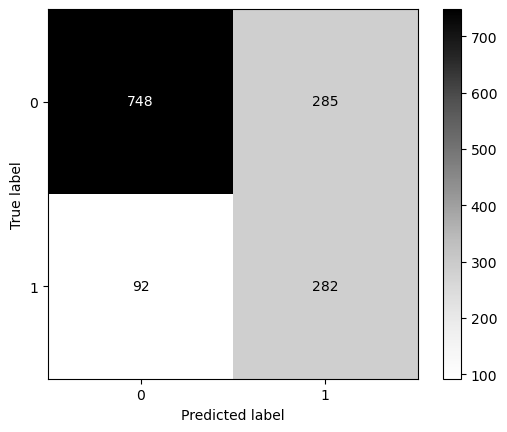

In [83]:
# predict probabilities
y_pred_func = model_func2.predict(test_dataset)
y_pred_func = (y_pred_func > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.show()

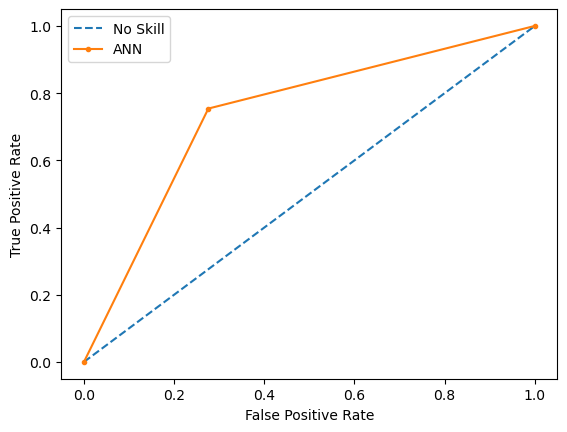

AUC score: 0.7390576225209787


In [84]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

## Model Saving

In [85]:
pickle.dump(full_pipeline, open('model_milestones1.pkl','wb'))

model_func2.save('model_churn.h5')

In [86]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.11.0
1.1.3
1.21.5


## Model Inference

In [87]:
inf = pd.DataFrame({'tenure': [34,1,6],
                    'MonthlyCharges': [29.60,42.30,70.70],
                    'SeniorCitizen': ['No','Yes','Yes'],
                    'Partner': ['Yes', 'No', 'Yes'],
                    'Dependents': ['Yes','Yes','Yes'],
                    'InternetService': ['No', 'DSL', 'Fiber optic'],
                    'DeviceProtection': ['Yes', 'No', 'Yes'],
                    'StreamingTV': ['No internet service', 'No', 'Yes'],
                    'StreamingMovies': ['No internet service', 'No', 'Yes'],
                    'Contract': ['One year', 'Two year', 'Month-to-month'],
                    'PaperlessBilling': ['Yes', 'No', 'Yes'],
                    'PaymentMethod': ['Bank transfer', 'Mailed check', 'Electronic check']})


In [88]:
inf

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,34,29.6,No,Yes,Yes,No,Yes,No internet service,No internet service,One year,Yes,Bank transfer
1,1,42.3,Yes,No,Yes,DSL,No,No,No,Two year,No,Mailed check
2,6,70.7,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Month-to-month,Yes,Electronic check


In [89]:
df_inf = full_pipeline.transform(inf)

In [90]:
inf_predict = np.round(model_func2.predict(np.array([df_inf[0]]))[0][0])
inf_predict

1/1 [==============================] - 0s 82ms/step


0.0

In [91]:
# interpretation for churn
if inf_predict == 0.0:
    print("The customer will not churn")
else:
    print("The customer will churn")

The customer will not churn


# Conclusion

Dari overall analysis dapat disimpulkan bahwa:

1. Pada milestone ini dilakukan pembuatan beberapa 2 model deep learning yaitu Functional API Method, dan Sequential API Method. Dari model-model tersebut, model terbaik adalah Functional API Method. Model ini juga menerapkan penyetelan hyperparameter secara manual.

2. Metrik evaluasi yang saya gunakan adalah metode recall, karena menurut saya orang yang melakukan churning namun tergolong tidak churning akan lebih merugikan TELCO.

3. 
Dan berikut adalah metrik evaluasi dari kedua model yang sudah dibuat:

| Model             | Accuracy  | Recall 1  | AUC Score |
|  :---             |  :----:   |    :----: |   :----:  |
| ANN Sequential    | 0.72      | 0.75      | 0.72      |
| ANN Functional    | 0.73      | 0.74      | 0.73      |
